# FIT5202 Assignment 1 : Analysing eCommerce Data

## Table of Contents
* 
    * [Part 1 : Working with RDD](#part-1)
        * [1.1 Data Preparation and Loading](#1.1)
        * [1.2 Data Partitioning in RDD](#1.2)
        * [1.3 Query/Analysis](#1.3)
    * [Part 2 : Working with DataFrames](#2-dataframes)
        * [2.1 Data Preparation and Loading](#2-dataframes)
        * [2.2 Query/Analysis](#2.2)
    * [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)

# Part 1 : Working with RDDs <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries for retail analysis. 

### 1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession you first need to build a SparkConf object that contains information about your application, use Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine. 

In [79]:
# Imoport SparkCof from pyspark 
from pyspark import SparkConf

# define cores that can be used to run Spark
master = "local[*]"
# application name
app_name = "MOTH"

# set the configuration
# .set("spark.cores.max", "2").set("spark.executor.memory", "4g")
spark_conf = SparkConf().setMaster(master).setAppName(app_name)\
            .set("spark.driver.memory", "4g")\
            .set("spark.executor.memory", "4g")\
            .set("spark.sql.session.timeZone", "Australia/Melbourne")

In [80]:
from pyspark.sql import SparkSession

# initiate Spark session
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
# initiate spark context with spark session
sc = spark.sparkContext
sc.setLogLevel('ERROR')

1.1.2 Load CUPS csv files into four RDDs.

In [3]:
# loading datasets into rdd 
cats_rdd = sc.textFile("category.csv")
users_rdd = sc.textFile("users.csv")
products_rdd = sc.textFile("product.csv")
sales_rdd = sc.textFile("sales.csv")

1.1.3 For each RDD, remove the header rows and display the total count and first 10 records. (Hint: You can use csv.reader to parse rows into RDDs.)

In [4]:
# category
# separate data by ','
cats_rdd1 = cats_rdd.map(lambda x: x.split(','))
# find the headers
cats_headers = cats_rdd1.take(1)[0]
# remove the headers
cats_rdd1 = cats_rdd1.filter(lambda x: x != cats_headers)

# show first 10 records 
cats_rdd1.take(10)

[['2090971686529663114', 'appliances.environment.vacuum'],
 ['2232732116498514828', 'apparel.jeans'],
 ['2232732109628244704', 'apparel.shirt'],
 ['2232732103294845523', 'apparel.shoes.step_ins'],
 ['2232732086500851925', 'apparel.scarf'],
 ['2232732100660822557', 'country_yard.cultivator'],
 ['2053013558282682943', 'construction.tools.drill'],
 ['2053013562527318829', 'furniture.living_room.cabinet'],
 ['2110937143172923797', 'construction.tools.light'],
 ['2074462942123786261', 'kids.toys']]

In [5]:
# users
# separate data by ','# separate data by ','
users_rdd1 = users_rdd.map(lambda x: x.split(','))
# find the headers
users_headers = users_rdd1.first()
# remove the headers
users_rdd1 = users_rdd1.filter(lambda x : x!= users_headers)

# show first 10 records 
users_rdd1.take(10)

[['514771925',
  'MERVYN',
  'Unknown',
  '1-5-1963',
  '30A LUCINDA AVENUE',
  '2260',
  'NSW',
  'male',
  'WAMBERAL'],
 ['531947692',
  'FALLON',
  'Unknown',
  '16-10-2002',
  '82 CAMBERWARRA DRIVE',
  '6025',
  'WA',
  'female',
  'CRAIGIE'],
 ['560231306',
  'KALIN',
  'Unknown',
  '19-8-2015',
  '74 SOLDIERS ROAD',
  '2281',
  'NSW',
  'male',
  'PELICAN'],
 ['575248835',
  'PIETTA',
  'Unknown',
  '19-1-1962',
  '"UNIT 1',
  ' 1 LARK AVENUE"',
  '5023',
  'SA',
  'female',
  'SEATON'],
 ['575243330',
  'SUMMAH',
  'Unknown',
  '19-4-1973',
  '44 CLARENDON ROAD',
  '2048',
  'NSW',
  'female',
  'STANMORE'],
 ['516606243',
  'KEIRA',
  'Unknown',
  '9-6-2011',
  '1 VIOLA CLOSE',
  '4868',
  'QLD',
  'female',
  'BAYVIEW HEIGHTS'],
 ['545807768',
  'VERITY',
  'Unknown',
  '1-2-1980',
  '31-33 KING STREET',
  '3550',
  'VIC',
  'female',
  'BENDIGO'],
 ['529118965',
  'MAXWELL',
  'Unknown',
  '16-5-2012',
  '15 HARWELL WAY',
  '6721',
  'WA',
  'male',
  'WEDGEFIELD'],
 ['518625

In [6]:
# Products 
# separate data by ','
products_rdd1 = products_rdd.map(lambda x: x.split(','))
# find the headers
products_headers = products_rdd1.first()
# remove the headers
products_rdd1 = products_rdd1.filter(lambda x: x!= products_headers)

# show first 10 records 
products_rdd1.take(10)

[['100168127', '2053013554096767303', '', '30.8171196068388'],
 ['7101887', '2232732103764607583', '', '33.6457534471799'],
 ['100058603', '2053013555438944659', '', '32.1982006550096'],
 ['100007811', '2232732112782361392', 'etro', '300.111251624047'],
 ['26400508', '2053013553056579841', '', '139.458912588293'],
 ['100215722', '2134905019189691101', '', '4.15035271832127'],
 ['32402016', '2232732115777094520', '', '5.90104832419485'],
 ['13201248', '2232732061804790604', 'brw', '400.468187201711'],
 ['2701879', '2053013563911439225', 'beko', '249.969115457257'],
 ['15300266', '2232732107698864813', '', '2.85509519214549']]

In [7]:
# sales 
# separate data by ','
sales_rdd1 = sales_rdd.map(lambda x: x.split(','))
# find the headers
sales_headers = sales_rdd1.first()
# remove the headers 
sales_rdd1 = sales_rdd1.filter(lambda x: x!= sales_headers)

# show the first 10 records
sales_rdd1.take(10)

[['338156802',
  '2020-03-27 02:03:48.000000 +00:00',
  '4804056',
  '171.56',
  '513119357',
  '0ad58441-9db9-48bd-9ee7-accf603f06e0'],
 ['338156808',
  '2020-03-27 02:03:49.000000 +00:00',
  '1005223',
  '209.53',
  '522277649',
  '2ecb2725-2c40-4acb-8ef1-05e39ea4c2cc'],
 ['338156913',
  '2020-03-27 02:04:11.000000 +00:00',
  '1005212',
  '174.25',
  '632847510',
  '43609582-1818-4885-bd72-3791f3a4ec93'],
 ['338156921',
  '2020-03-27 02:04:13.000000 +00:00',
  '1005236',
  '231.15',
  '626579483',
  'bbf972ef-8f8d-4a33-bcbd-ac09af67ea40'],
 ['338156953',
  '2020-03-27 02:04:18.000000 +00:00',
  '1005212',
  '174.25',
  '633245502',
  '90166e0d-d7da-4997-b479-bc3a0fd724d6'],
 ['338156985',
  '2020-03-27 02:04:24.000000 +00:00',
  '100132156',
  '47.5',
  '541680528',
  '4cd111cc-8716-4720-b7e3-bc3c8ddce98f'],
 ['338157055',
  '2020-03-27 02:04:37.000000 +00:00',
  '3500009',
  '290.84',
  '618162129',
  'd0bda424-a759-4941-b9be-5091c28009db'],
 ['338157122',
  '2020-03-27 02:04:48.000

1.1.4 Drop unnecessary columns from RDDs: firstname, lastname, user_session.

In [8]:
# drop firstname and lastname from users
users_rdd1 = users_rdd1.map(lambda x: x[:1] + x[3:])

users_rdd1.take(1)

[['514771925',
  '1-5-1963',
  '30A LUCINDA AVENUE',
  '2260',
  'NSW',
  'male',
  'WAMBERAL']]

In [9]:
# drop user_session fom sales
sales_rdd1 = sales_rdd1.map(lambda x : x[:-1])

sales_rdd1.take(1)

[['338156802',
  '2020-03-27 02:03:48.000000 +00:00',
  '4804056',
  '171.56',
  '513119357']]

### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, print out the total number of partitions and the number of records in each partition. Answer the following questions: How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it will be partitioned in this number? If I only have one single core CPU in my PC, what is the default partition's number? (Hint: search the Spark source code to try to answer this question.) Write code and your explanation in Markdown cells.

In [10]:
from pyspark.rdd import RDD

In [11]:
# define function that is used to print needed information
def print_partition(rdd):
    # get number of partitions
    num_partitions = rdd.getNumPartitions()
    
    print(f"Number of partitions: {num_partitions}")
    print(f"Method of partition: {rdd.partitioner}")
    
    # Instead of using glom().collect to collect all data, I use mapPartitions to count records in each partition then collect
    ## only the result of counting
    partition_sizes = rdd.mapPartitions(lambda partition: [sum(1 for _ in partition)]).collect()
    
    # loop through each element and displays idx and number of records 
    for idx, partition_size in enumerate(partition_sizes):
        print(f"Partition {idx}")
        print(f"Number of records: {partition_size}")

In [12]:
# print information from category
print_partition(cats_rdd1)

Number of partitions: 2
Method of partition: None
Partition 0
Number of records: 647
Partition 1
Number of records: 817


In [13]:
# print information from users
print_partition(users_rdd1)

Number of partitions: 39
Method of partition: None
Partition 0
Number of records: 407684
Partition 1
Number of records: 407751
Partition 2
Number of records: 407663
Partition 3
Number of records: 407640
Partition 4
Number of records: 407740
Partition 5
Number of records: 407698
Partition 6
Number of records: 407764
Partition 7
Number of records: 407723
Partition 8
Number of records: 407732
Partition 9
Number of records: 407782
Partition 10
Number of records: 407851
Partition 11
Number of records: 407787
Partition 12
Number of records: 407659
Partition 13
Number of records: 407782
Partition 14
Number of records: 407827
Partition 15
Number of records: 407766
Partition 16
Number of records: 407888
Partition 17
Number of records: 407701
Partition 18
Number of records: 407788
Partition 19
Number of records: 407748
Partition 20
Number of records: 407745
Partition 21
Number of records: 407862
Partition 22
Number of records: 407724
Partition 23
Number of records: 407781
Partition 24
Number of 

In [14]:
# print information from products
print_partition(products_rdd1)

Number of partitions: 2
Method of partition: None
Partition 0
Number of records: 104192
Partition 1
Number of records: 104098


In [15]:
# print information from sales
print_partition(sales_rdd1)

Number of partitions: 22
Method of partition: None
Partition 0
Number of records: 315832
Partition 1
Number of records: 315940
Partition 2
Number of records: 316009
Partition 3
Number of records: 319748
Partition 4
Number of records: 319808
Partition 5
Number of records: 319827
Partition 6
Number of records: 319861
Partition 7
Number of records: 319855
Partition 8
Number of records: 317174
Partition 9
Number of records: 316760
Partition 10
Number of records: 316656
Partition 11
Number of records: 316733
Partition 12
Number of records: 316682
Partition 13
Number of records: 316607
Partition 14
Number of records: 316439
Partition 15
Number of records: 316229
Partition 16
Number of records: 316253
Partition 17
Number of records: 316229
Partition 18
Number of records: 316133
Partition 19
Number of records: 316127
Partition 20
Number of records: 316023
Partition 21
Number of records: 187899


**ANS**
1. Category rdd has 2 partitions
2. User rdd has 39 partitions
3. Product rdd has 2 partitions
4. Sales rdd has 22 partitions

By default Spark will utilise Random Equal Partitioning as a defalut method.

Accordnig to source code, if number of cores is more than one and our data is less than 128 Mb, the defulat number of partitions will be 2 (in this case product and category). When data is greater than 128 Mb (one blocks), they will be divided into many 128-Mb blocks (ie: users and sales). 

When a computer has a single core, it cannot achive parallelism, hence there will be only one partition.

1.2.2. Create a user defined function (UDF) to transform category_code to capitalized words. (e.g. apparel.shoes.ballet_shoes shall be converted to “Apparel Shots Ballet_shoes).

In [16]:
# define udf 
def capitalize(data):
    # separate by .
    cat_code = data[1].split('.')
    # define initial word
    full_word = ''
    
    # loop throng list of cat_code
    for word in cat_code:
        # capitallize each word
        word = word.capitalize()
        # add to the initial word follow by space
        full_word += word + ' '
        
    # remove space at the end of the word 
    full_word = full_word[:-1]
    # return catagory_id and code
    return [data[0] ,full_word]

In [17]:
cats_rdd1 = cats_rdd1.map(lambda x: capitalize(x))

In [18]:
cats_rdd1.take(1)

[['2090971686529663114', 'Appliances Environment Vacuum']]

1.2.3. Join Product and Category RDDs and Create a new key value RDD, using brand as the key and all of the categories of that brand as the value. Print out the first 5 records of the key-value RDD.

In [19]:
# join between cat and product
joined_rdd = cats_rdd1.join(products_rdd1.map(lambda x: [x[1], x[2], x[0]]))

In [20]:
# define function[(brand1, (cat1))....]
def extract_key_value(data):
    # filter the brand name with ''
    if data[1][1] != '':
        # split cat_code 
        cat = tuple(data[1][0].split(' '))
        # return brand and list of cat_code
        return data[1][1], cat

In [21]:
# map the extract key value function and filter None out from the rdd
joined_rdd = joined_rdd.map(lambda x: extract_key_value(x))\
            .filter(lambda x: x is not None)

In [22]:
joined_rdd.take(1)

[('bravat', ('Furniture', 'Living_room', 'Cabinet'))]

In [23]:
# define zero_value, seq_func, com_func
zero_value = []

# define sequence function
def seq_func(init, value):
    # turn tuple to list
    value = list(value,)
    # concat initial list and value list
    value_list = init + value
    # find the unique value in list 
    value_list = list(set(value_list))
    return value_list

# define combined function
def com_func(acc1, acc2):
    # concat value_lists
    full_list = acc1 + acc2
    # find the unique value for combined list
    full_list = list(set(full_list))
    return full_list

In [24]:
# apply aggrageateByKey
joined_rdd = joined_rdd.aggregateByKey(zero_value, seq_func, com_func)

In [25]:
# transforma data from list to tuple
joined_rdd = joined_rdd.map(lambda x: (x[0], tuple(x[1])))

In [26]:
joined_rdd.take(5)

[('domani-spa',
  ('Electronics',
   'Furniture',
   'Clocks',
   'Cabinet',
   'Others',
   'Living_room',
   'Bathroom',
   'Bath')),
 ('midea',
  ('Videoregister',
   'Costume',
   'Camera',
   'Photo',
   'Dishwasher',
   'Kitchen',
   'Construction',
   'Washer',
   'Oven',
   'Air_conditioner',
   'Hob',
   'Welding',
   'Swing',
   'Blender',
   'Cooler',
   'Electronics',
   'Others',
   'Bedroom',
   'Microwave',
   'Hood',
   'Refrigerators',
   'Components',
   'Tools',
   'Appliances',
   'Air_heater',
   'Clocks',
   'Blanket',
   'Computers',
   'Accessories',
   'Iron',
   'Generator',
   'Massager',
   'Kids',
   'Belt',
   'Auto',
   'Furniture',
   'Personal',
   'Environment',
   'Apparel',
   'Tshirt',
   'Vacuum',
   'Water_heater')),
 ('fissman',
  ('Camera',
   'Chair',
   'Kitchen',
   'Construction',
   'Bag',
   'Electronics',
   'Others',
   'Printer',
   'Tools',
   'Appliances',
   'Peripherals',
   'Computers',
   'Accessories',
   'Generator',
   'Living_

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

**1.3.1 Calculate the average daily sales for each year, each month. Print the results as the following format(see assignment specification).**

In [27]:
# import re for regex
import re
# import calendat for function related to time/date
import calendar

In [28]:
# define function for extracting year month day and price
def extract_year_month_day_price(data):
    # define a pattern for date
    date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
    # search and return matches
    match = date_pattern.search(data[1]).group()
    # retrun as key value 
    return match, float(data[3])

In [29]:
# apply the function to sales
sales_rdd2 = sales_rdd1.map(lambda x: extract_year_month_day_price(x))

In [30]:
# define function initial value and function for aggregatebyKey
# define initial value
initial = 0
def seq_func(init_value, value):
    # sum price with same key
    sum_value = init_value + value
    return sum_value

def com_func(acc1, acc2):
    # sum price between partitions
    total_value = acc1 + acc2
    return total_value

In [31]:
# apply the aggregate function
sales_rdd3 = sales_rdd2.aggregateByKey(initial, seq_func, com_func)

In [32]:
sales_rdd3.take(5)

[('2020-03-31', 7251127.0900001135),
 ('2020-04-03', 8612723.350000067),
 ('2020-04-06', 6961658.569999886),
 ('2020-04-27', 9614887.47999989),
 ('2019-11-23', 6339110.070000217)]

In [33]:
# defind function that extract only year, month and price
def extract_year_month_price(data):
    date_pattern = re.compile(r'\d{4}-\d{2}')
    match = date_pattern.search(data[0]).group()
    # retrun as key value 
    return match, data[1]

In [34]:
# transform data 
sales_rdd3 = sales_rdd3.map(lambda x : extract_year_month_price(x))

In [35]:
sales_rdd3.take(1)

[('2020-03', 7251127.0900001135)]

In [36]:
# define aggregate function that return sum of price for each month and days count
initial = (0, 0) # (value, count)
def seq_func(init_value, value):
    # sum price
    sum_value = init_value[0] + value
    # increse count 1
    count = init_value[1] + 1
    return sum_value, count

def com_func(acc1, acc2):
    # sum all prices
    total_value = acc1[0] + acc2[0]
    # sum all count
    total_count = acc1[1] + acc2[1]
    return total_value, total_count

In [37]:
# appy the aggregate function
sales_rdd3 = sales_rdd3.aggregateByKey(initial, seq_func, com_func)

In [38]:
sales_rdd3.take(1)

[('2020-02', (381178935.42000693, 29))]

In [39]:
# find the avg daily sales
sales_rdd3 = sales_rdd3.map(lambda x: (x[0], round(x[1][0] / x[1][1], 2)))

# sort by year and month 
sales_rdd3 = sales_rdd3.sortBy(lambda x: x[0])

# collect as list
sales_summary_list = sales_rdd3.collect()

In [40]:
# print the desire output
print(f'''+----+-----+------------------+
|Year|Month|         avg sales|
+----+-----+------------------+''')
for item in sales_summary_list:
    print("|{:<4}|{:>5}|{:>18.2f}|".format(item[0][:4], item[0][5:], item[1]))
print('+----+-----+------------------+')

+----+-----+------------------+
|Year|Month|         avg sales|
+----+-----+------------------+
|2019|   10|        7417983.94|
|2019|   11|        9489478.98|
|2019|   12|       11102478.36|
|2020|   01|        8701162.34|
|2020|   02|       13144101.22|
|2020|   03|       10367045.43|
|2020|   04|        8150859.74|
+----+-----+------------------+


**1.3.2 Find 10 of the best selling brands. You should display the brand and total revenue in the result.**

In [41]:
# find product id with maximum category_id
products_rdd2 = products_rdd1.map(lambda x: (x[0], int(x[1])))

In [42]:
# define function that use for aggregate all catagory_id under on product_id
init = []

def seq_func(initial,data):
    initial.append(data)
    return initial

def com_func(acc1, acc2):
    all_cat_id = acc1 + acc2
    return all_cat_id

In [43]:
# apply the function 
products_rdd2 = products_rdd2.aggregateByKey(init, seq_func, com_func)

In [44]:
products_rdd2.take(2)

[('100168127', [2053013554096767303]), ('100007811', [2232732112782361392])]

In [45]:
# finding max category_id in value list
products_rdd2 = products_rdd2.map(lambda x: (x[0], max(x[1])))

In [46]:
# transform product_rdd2 to key value rdd
products_rdd2 = products_rdd2.map(lambda x: ((x[0], x[1]), 1))

In [47]:
# transform product_rdd1 to key value pair and remove brand name with ''
products_rdd3 = products_rdd1.map(lambda x: ((x[0], int(x[1])), x[2]))\
                .filter(lambda x: x[1] != '')

In [48]:
# joining products_rdd2 with products_rdd3 filter out all None 
joined_products_rdd = products_rdd2.leftOuterJoin(products_rdd3)\
                    .map(lambda x: (x[0], x[1][1]))\
                    .filter(lambda x: x[1] is not None)

In [49]:
# we can see that one product_id and one category_id are belong to multiple brand
joined_products_rdd.aggregateByKey(init, seq_func, com_func)\
.filter(lambda x: len(x[1])>1).take(5)

[(('2500859', 2232732092565815652), ['asel', 'optima']),
 (('100167775', 2232732113310843708), ['decathlon', 'quechua']),
 (('22700129', 2232732091643068746), ['stels', 'force']),
 (('31000205', 2232732115072451430), ['craft', 'deeper']),
 (('31501238', 2232732115617710964), ['blanco', 'luminarc'])]

In [50]:
# reduce join to a key value pair with brands under the key 
joined_products_rdd = joined_products_rdd.aggregateByKey(init, seq_func, com_func)

In [51]:
# reduce the list of brands to one brad at index 0
joined_products_rdd = joined_products_rdd.map(lambda x: (x[0],x[1][0]) if len(x[1]) > 1 else x)

In [52]:
# transform joined_products_rdd
joined_products_rdd = joined_products_rdd.map(lambda x: (x[0][0], x[1][0]))

In [53]:
# transform sales to key value pairs
sales_rdd4 = sales_rdd1.map(lambda x: (x[2], x[3]))

In [54]:
# join sales info and product info
joined_sales_products = sales_rdd4.leftOuterJoin(joined_products_rdd)\
                        .map(lambda x: (x[1][1], float(x[1][0])))

In [55]:
# reduce by key filter out all None then sort by desc
top_ten = joined_sales_products.reduceByKey(lambda x, y: x+y)\
.filter(lambda x: x[0] is not None)\
.sortBy(lambda x: x[1], ascending =False).take(10)

In [56]:
top_ten

[('apple', 929384775.6401131),
 ('samsung', 425969696.7500096),
 ('xiaomi', 91068828.39000347),
 ('huawei', 42307012.609998636),
 ('lg', 38228972.82999976),
 ('sony', 28529954.99999871),
 ('lucente', 28392306.440000042),
 ('acer', 27610850.920000117),
 ('oppo', 26143937.059998218),
 ('lenovo', 23722112.01999936)]

## Part 2. Working with DataFrames <a class="anchor" name="2-dataframes"></a>
In this section, you will need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

**2.1.1. Load CUPS into four separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each columns (Note: Initially, you should read date/time related column as the string type).**

In [66]:
from pyspark.sql.types import *

In [57]:
df_cat = spark.read.csv("category.csv", header=True, inferSchema=True)
df_user = spark.read.csv("users.csv", header=True, inferSchema=True)
df_prod = spark.read.csv("product.csv", header=True, inferSchema=True)

In [70]:
sale_data_type = StructType([
    StructField('id', StringType(), nullable=True),
    StructField('sales_timestamp', StringType(), nullable=True),
    StructField('product_id', IntegerType(), nullable=True),
    StructField('price', DoubleType(), nullable=True),
    StructField('user_id', IntegerType(), nullable=True),
    StructField('user_session', StringType(), nullable=True)
])

In [71]:
df_sale = spark.read.csv("sales.csv", header=True, schema=sale_data_type)

**2.1.2 Display the schema of the four dataframes.**

In [58]:
df_cat.printSchema()

root
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)



In [59]:
df_user.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- suburb: string (nullable = true)



In [60]:
df_prod.printSchema()

root
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: double (nullable = true)



In [72]:
df_sale.printSchema()

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API.   

**2.2.1. Transform the 'sales_time' column in the sales dataframe to the date type; extract the hour in sales_date and create a new column “sales_hour”; after that, show the schema.**

In [73]:
import pyspark.sql.functions as F

In [74]:
# transform sales_timestamp from str to timestamp
df_sale = df_sale.withColumn("sales_timestamp", F.to_timestamp(df_sale.sales_timestamp))

# create sales_date column
df_sale = df_sale.withColumn("sales_date", F.to_date(df_sale.sales_timestamp, "yyyy-MM-dd"))

# create sales_hour column
df_sale = df_sale.withColumn("sales_hour", F.hour(df_sale.sales_timestamp))

In [75]:
# show the schema
df_sale.printSchema()

root
 |-- id: string (nullable = true)
 |-- sales_timestamp: timestamp (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_date: date (nullable = true)
 |-- sales_hour: integer (nullable = true)



**2.2.2. Calculate total sales for each hour, sort your result based on each hour’s sales in a descending order. Print out the sales_hour and total_sales columns.**

In [81]:
# use group by to group by sales_hours and sum all price as total_sales
df_hour_sales = df_sale.groupby('sales_hour')\
                .agg(F.sum('price')\
                .alias('total_sales'))\
                .orderBy(F.col('total_sales').desc())

In [82]:
df_hour_sales.show(24)

+----------+--------------------+
|sales_hour|         total_sales|
+----------+--------------------+
|        20|1.5351197236000213E8|
|        19| 1.521627993100025E8|
|        21|1.4724680875000224E8|
|        18| 1.441795846300025E8|
|        22|1.3618101099000084E8|
|        17|1.3607539438000154E8|
|        23|1.2559894061000021E8|
|        16|1.2284067474000046E8|
|         0| 1.169956001100005E8|
|         1|1.1080353314999993E8|
|         2|1.0287751746999983E8|
|        15|1.0100994596999954E8|
|         3| 9.441016929000013E7|
|         4| 8.541564229000033E7|
|         5| 7.093822263000044E7|
|        14| 6.736174058999965E7|
|         6| 5.266716998999994E7|
|         7| 3.429415210999993E7|
|        13|3.1814464309999984E7|
|         8|2.2258807820000015E7|
|         9|1.4789580690000007E7|
|        12|1.4245705460000014E7|
|        10|1.0073946459999997E7|
|        11|    9693843.75000001|
+----------+--------------------+



**2.2.3.Find 10 most profitable categories (profit can be simply defined as price - avg_cost). Print out the category name and total profit. Please print the category name in capitalized word format(hint: you can reuse the UDF defined in part 1.)**

In [83]:
# find product id with max category_id
df_prod_id = df_prod.groupby('product_id')\
            .agg(F.max('category_id')\
                .alias('category_id'))

In [84]:
# join df_prod_id with df_prod
df_prod_filtered = df_prod_id\
        .join(df_prod.drop('brand'), on = ['product_id', 'category_id'] , how='left')

In [85]:
# we can see that one product_id and category_id belongs to multiple avg_price
df_prod_filtered.groupBy('product_id', 'category_id')\
.count().filter(F.col('count')>1).show(5)

+----------+-------------------+-----+
|product_id|        category_id|count|
+----------+-------------------+-----+
|  28102217|2053013564918072245|    2|
| 100188730|2232732135213498718|    2|
|  15200176|2053013557192163841|    2|
|  26205147|2232732081585127530|    2|
| 100041440|2232732113948377930|    2|
+----------+-------------------+-----+
only showing top 5 rows



In [86]:
# choose the maximum avg price
df_prod_filtered = df_prod_filtered.groupBy('product_id', 'category_id')\
                 .agg(F.max('avg_cost')\
                      .alias('avg_cost'))

In [87]:
# join between sales and product
df_sales_product = df_sale.join(df_prod_filtered, on=['product_id'], how= 'left')

In [88]:
# calculate profit price - avg
df_sales_product = df_sales_product\
                .withColumn('profit', df_sales_product.price - df_sales_product.avg_cost)

# select only needed
df_sales_product = df_sales_product.select('category_id', 'profit')

# aggragte based on category_id
df_sales_product = df_sales_product.groupby('category_id')\
                .agg(F.sum('profit').alias('total_profit'))

In [89]:
# define udf
def capitalize(data):
    cat_code = data.split('.')
    full_word = ''
    for word in cat_code:
        word = word.capitalize()
        full_word += word + ' '
        
    full_word = full_word[:-1]
    return full_word

# register udf
capitalize_udf = F.udf(capitalize, F.StringType())

In [90]:
# apply capitalize_udf to df_cat
df_cat = df_cat.select('category_id', 'category_code', capitalize_udf('category_code')\
                       .alias('category_code_cap')).drop('category_code')

# rename to the correct name 
df_cat = df_cat.withColumnRenamed('category_code_cap', 'category_code')

In [91]:
# join all datasets
df_joined = df_sales_product.join(df_cat, on= ['category_id'], how= 'left')

# calculate total_profit of each category_code
df_joined = df_joined.groupBy('category_code')\
          .agg(F.sum('total_profit').alias('total_profit'))\
          .orderBy(F.col('total_profit').desc())

In [92]:
# round the total_profit
df_joined = df_joined.withColumn('total_profit', F.round(df_joined.total_profit))

In [93]:
df_joined.show(10)

+--------------------+------------+
|       category_code|total_profit|
+--------------------+------------+
|Construction Tool...| 5.5594871E7|
|              Others|   5920057.0|
|Appliances Person...|   5168128.0|
|Appliances Kitche...|   4157170.0|
|  Computers Notebook|   2465817.0|
|  Electronics Clocks|   2013943.0|
|Appliances Kitche...|   1427200.0|
|           Sport Ski|   1277497.0|
|Appliances Enviro...|   1160617.0|
|Electronics Smart...|    956346.0|
+--------------------+------------+
only showing top 10 rows



**2.2.4. Use DataFrame filters to find all transactions sold at loss (defined as price < avg_cost), calculate 10 worst loss margin in percentage. (margin is defined as (price - avg_cost)/avg_cost; if price - avg_cost > 0, it’s call a profit margin; otherwise a loss margin)**

In [94]:
# join sales product
df_sales_product1 = df_sale\
                .join(df_prod_filtered, on= ['product_id'], how= 'left')

# create sold_at_loss column
df_sales_product1 = df_sales_product1\
                .withColumn('sold_at_loss', df_sales_product1.price - df_sales_product1.avg_cost)

# create margin column
df_sales_product1 = df_sales_product1\
                .withColumn('margin', (df_sales_product1.sold_at_loss / df_sales_product1.avg_cost) * 100)

# sort by margin
df_sales_product1 = df_sales_product1.sort('margin')


In [95]:
df_sales_product1.select('id', 'margin').show(10)

+---------+------------------+
|       id|            margin|
+---------+------------------+
|204037762|-99.23549548710929|
|204017856|-99.23549548710929|
|396531551|-99.17671185020558|
|394075934|-99.17671185020558|
|394083902|-99.17671185020558|
|394106370|-99.17671185020558|
|394112198|-99.17671185020558|
|394129754|-99.17671185020558|
|396544717|-99.17671185020558|
|396598353|-99.17671185020558|
+---------+------------------+
only showing top 10 rows



**2.2.5. Draw a barchart to show total sales from different states in each year.**

In [96]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [97]:
# create new column 'year'
df_sale1 = df_sale.withColumn('year', F.year(df_sale.sales_timestamp))

# select needed cols 
df_sale1 = df_sale1.select('user_id', 'year', 'price')

# select only needed cols from user
df_user1 = df_user.select('user_id', 'state')

# join salses and users datasets
df_sale_user = df_sale1.join(df_user1, on= ['user_id'], how= 'left')

In [98]:
# calculate total_sales for each year for each state
df_sale_user = df_sale_user.groupBy('year', 'state')\
            .agg(F.sum('price').alias('total_sales'))

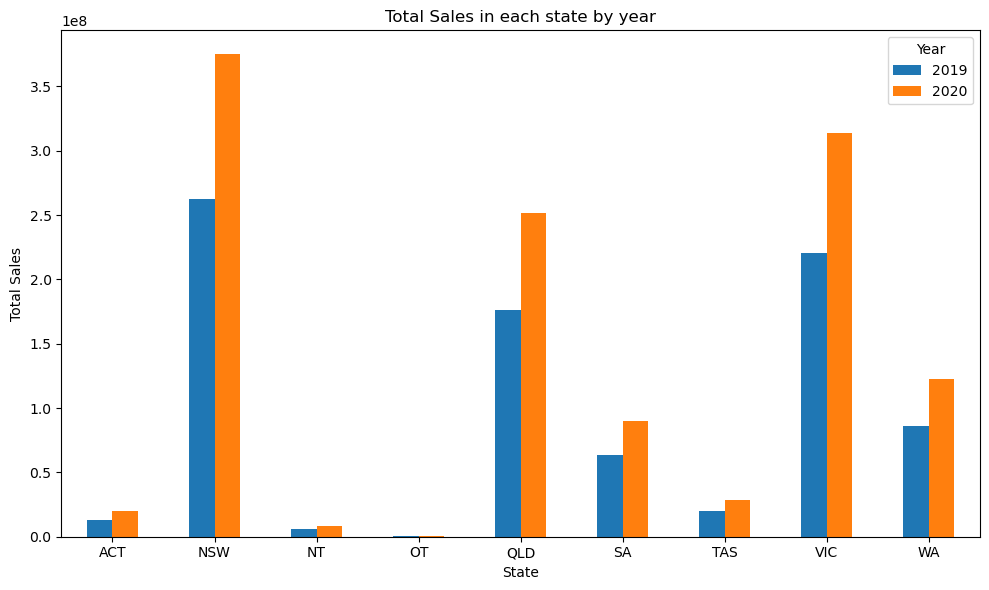

In [99]:
# convert pyspark df to pandas df
df_sale_user = df_sale_user.toPandas()

# pivot the data to have states as columns
pivot_table = df_sale_user.pivot(index="state", columns="year", values="total_sales")

# ploting
ax = pivot_table.plot(kind="bar", figsize=(10, 6))
plt.title('Total Sales in each state by year')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title="Year")

# show the bar chart
plt.tight_layout()
plt.show()

**2.2.6. Draw a scatter plot of customer age and their total spending with MOTH. To limit the number of datapoints, you may show the top 1000 “most valuable” customers only. You may also use log scale for the XY axis.**

In [100]:
# select needed cols from sales
df_sale2 = df_sale.select('user_id','sales_date', 'price')

# select needed cols from users
df_user2 = df_user.select('user_id', 'dob')

# change date from str to datetype
df_user2 = df_user2.withColumn('dob', F.to_date(df_user2.dob, 'd-M-yyyy'))

# join sales and users
df_sales_users = df_sale2.join(df_user2, on=['user_id'], how= 'left')


In [101]:
# calculate users age by sales_timestamp - dob / 365.25
df_sales_users = df_sales_users\
            .withColumn('user_age', (F.datediff(df_sales_users.sales_date, df_sales_users.dob)/365.25).cast('int'))

In [102]:
# caculate total_spending and sort by desc
df_sales_users = df_sales_users.groupby('user_id', 'user_age')\
            .agg(F.sum('price').alias('total_spending'))\
            .sort('total_spending', ascending=False)

In [103]:
# convert pysaprk df to pandas df
df_sales_users = df_sales_users.toPandas()

# select only first 1000 records
df_sales_users = df_sales_users.iloc[0:1000]

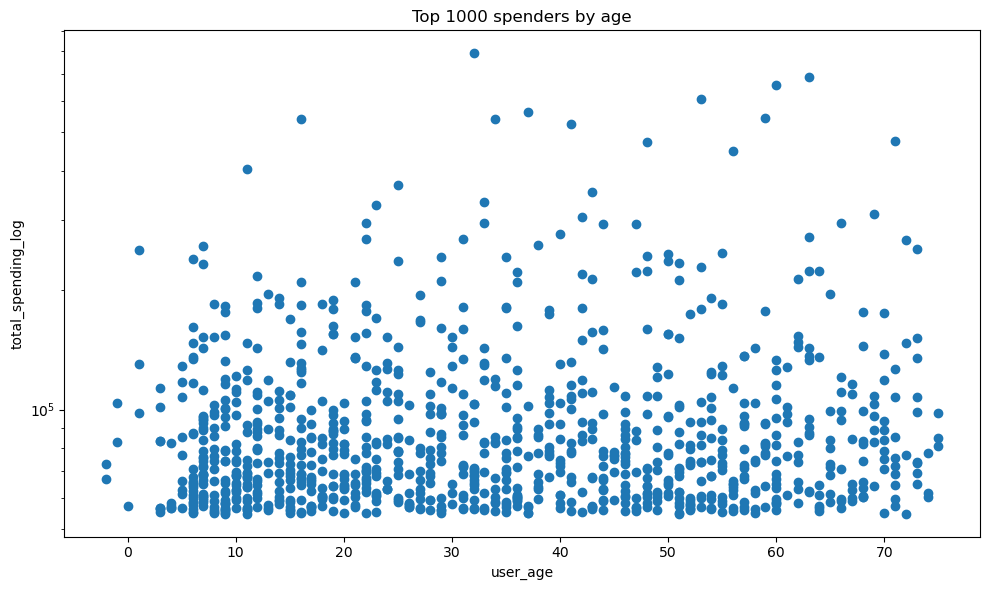

In [104]:
# ploting
plt.figure(figsize=(10, 6))
plt.scatter(df_sales_users['user_age'], df_sales_users['total_spending'])
plt.xlabel('user_age')
plt.ylabel('total_spending_log')
plt.yscale('log')
plt.title('Top 1000 spenders by age')

# Show the bar chart
plt.tight_layout()
plt.show()

### Part 3 RDDs vs DataFrame vs Spark SQL (15%) <a class="anchor" name="part-3"></a>
Implement the following queries using RDDs, DataFrames in SparkSQL separately. Log the  time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference between these 3 approaches. 


#### Query: Find top 100 most popular products (by total sales) among user age group 20-40, group by brand, and show total sales revenue of each brand.

#### 3.1. RDD Implementation

In [105]:
# import libaries
from datetime import datetime
from pyspark.sql.types import DateType

In [106]:
# load datasets
sales_rdd = sc.textFile('sales.csv')
users_rdd = sc.textFile('users.csv')
products_rdd = sc.textFile('product.csv')

In [107]:
# preprcess sales
sales_rdd1 = sales_rdd.map(lambda x: x.split(','))
sales_headers = sales_rdd1.first()
sales_rdd1 = sales_rdd1.filter(lambda x: x!= sales_headers)

In [108]:
# preprocess users
users_rdd1 = users_rdd.map(lambda x: x.split(','))
users_headers = users_rdd1.first()
users_rdd1 = users_rdd1.filter(lambda x: x!= users_headers)

In [109]:
# preprocess products
products_rdd1 = products_rdd.map(lambda x: x.split(','))
products_headers = products_rdd1.first()
products_rdd1 = products_rdd1.filter(lambda x: x!= products_headers)

In [110]:
%%time
# define function to convernt data and timestamp
def convert_timestamp(timestamp):
    time = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f %z')
    return time.date()

def convert_date(str_date):
    date = datetime.strptime(str_date, '%d-%m-%Y').date()
    return date

# transform to be key value pairs
# user_id, sales_timestamp, price, product_id
sales_rdd1 = sales_rdd1.map(lambda x: (x[4], [x[1], float(x[3]), x[2]]))

# user_id, dob
users_rdd1 = users_rdd1.map(lambda x: (x[0], [x[3]]))

# join sales and users
sales_users_rdd = users_rdd1.rightOuterJoin(sales_rdd1)

# transform sales users to key value pairs
sales_users_rdd = sales_users_rdd.map(lambda x:(x[0], x[1][0][0], x[1][1][0], x[1][1][1], x[1][1][2]))
sales_users_rdd = sales_users_rdd.map(lambda x: (x[4], list(x[:4])))

# preprocess product_rddabs1
# find the latest version of brand based on category id
products_rdd1 = products_rdd1.map(lambda x: (x[0], int(x[1]), x[2]))

# create key value pairs
products_rdd2 = products_rdd1.map(lambda x: (x[0], x[1]))

# define function for aggregate by key
init = []

def seq_func(initial,data):
    initial.append(data)
    return initial

def com_func(acc1, acc2):
    all_cat_id = acc1 + acc2
    return all_cat_id

# apply aggreateByKey
products_rdd2 = products_rdd2.aggregateByKey(init, seq_func, com_func)

# find max
products_rdd2 = products_rdd2.map(lambda x: (x[0], max(x[1])))

# create key_value pair of product_rdd2
products_rdd2 = products_rdd2.map(lambda x: (x, 1))

# transform original product_rdd1 to key value pairs
products_rdd1 = products_rdd1.map(lambda x: ((x[0], x[1]), x[2]))

# join by orginal product data and aggreate all value
products_rdd2 = products_rdd2.leftOuterJoin(products_rdd1).reduceByKey(lambda x, y:x)

# keep only product_id and brand and filter out '' from brands
products_rdd2 = products_rdd2.map(lambda x: (x[0][0], x[1][1])).filter(lambda x: x[1] != '')

# filter Unknown 
sales_users_rdd1 = sales_users_rdd.filter(lambda x: x[1][1] != 'Unknown')


# convert str to date
sales_users_rdd1 = sales_users_rdd1.map(lambda x: (x[0], convert_date(x[1][1]), convert_timestamp(x[1][2]), x[1][3]))

# find the age of users
sales_users_rdd1 = sales_users_rdd1.map(lambda x: ((x[0], (int((x[2]-x[1]).days/365.25), x[3]))))

# filter 20 <=  age <=40
sales_users_rdd1 = sales_users_rdd1.filter(lambda x: 20<=x[1][0]<=40)

# transform sales users and find total revenu of product
sales_users_rdd1 = sales_users_rdd1.map(lambda x: (x[0], x[1][1])).reduceByKey(lambda x, y: x+y)

# sort and take top 100
sales_users_rdd1 = sales_users_rdd1.sortBy(lambda x: x[1], ascending=False).take(100)

# transform list to rdd
sales_users_rdd1 = sc.parallelize(sales_users_rdd1)

# joining all datasets
joined_rdd = sales_users_rdd1.leftOuterJoin(products_rdd2)\
            .map(lambda x: (x[1][1], x[1][0])).reduceByKey(lambda x,y : x+y)\
            .sortBy(lambda x: x[1], ascending= False)

joined_rdd.take(100)

CPU times: user 153 ms, sys: 71.7 ms, total: 225 ms
Wall time: 2min 15s


[('apple', 247499120.88),
 ('samsung', 84397361.38999996),
 ('xiaomi', 8074406.689999999),
 ('huawei', 4995218.6),
 ('oppo', 3971586.469999999),
 ('thermomix', 1673596.5000000005),
 ('sony', 1628665.1299999985),
 ('acer', 1050838.0299999998)]

#### 3.2. DataFrame Implementation

In [117]:
# load datasets
df_user = spark.read.csv("users.csv", header=True, inferSchema=True)
df_prod = spark.read.csv("product.csv", header=True, inferSchema=True)

In [118]:
df_sale = spark.read.csv("sales.csv", header=True, schema=sale_data_type)
# transform sales_timestamp from str to timestamp
df_sale = df_sale.withColumn("sales_timestamp", F.to_timestamp(df_sale.sales_timestamp))

In [122]:
df_prod1.show(5)

+----------+-------------------+------+
|product_id|        category_id| brand|
+----------+-------------------+------+
|  12709917|2053013553199186187|sailun|
| 100172878|2053013552167387343|rooman|
| 100086368|2053013554658804075|lenovo|
|  11500291|2053013554625249641|   jbl|
|   1004739|2232732093077520756|xiaomi|
+----------+-------------------+------+
only showing top 5 rows



In [134]:
%%time
# find max category of each product_id
df_prod_id = df_prod.groupBy('product_id').agg(F.max('category_id').alias('category_id'))

# join data product data set 
df_prod1 = df_prod_id.join(df_prod.select('product_id', 'category_id', 'brand'), on= ['product_id', 'category_id'], how= 'left')\
          .dropna('any').dropDuplicates(['product_id'])

# select needed cols
df_user1 = df_user.select('user_id', 'dob')

# join sales and users
df_sale_user = df_sale.join(df_user1, on= ['user_id'], how= 'left')

# register udf
convert_date_udf = F.udf(convert_date, DateType())
convert_timestamp_udf = F.udf(convert_timestamp, DateType())

# join all data set
joined_df = df_sale_user.join(df_prod1, on= ['product_id'], how='left')

# transform dob to datetype
joined_df = joined_df.withColumn('dob', convert_date_udf(joined_df.dob))

# find age of customer
joined_df = joined_df.withColumn('age', (F.datediff(joined_df.sales_timestamp, joined_df.dob)/365.25).cast('int'))

# filter between 20 and 40
joined_df = joined_df.filter((F.col('age') <= 40) & (F.col('age')>=20))

# find total_revenu of product and brand
joined_df = joined_df.groupBy(['product_id', 'brand']).agg(F.sum('price').alias('total_sales'))\
            .sort('total_sales', ascending=False).limit(100)

# find total revenu of brands
joined_df.groupBy(['brand']).agg(F.sum('total_sales').alias('total_revenu')).show(20)

+---------+--------------------+
|    brand|        total_revenu|
+---------+--------------------+
|    apple|2.4751507813999936E8|
|  samsung| 8.439816068999745E7|
|   xiaomi|    8074585.56000013|
|   huawei|   4995679.360000054|
|     oppo|  3971794.8299998804|
|thermomix|  1673596.5000000128|
|     sony|  1628665.1300000374|
|   lenovo|  1050838.0300000026|
+---------+--------------------+

CPU times: user 16.5 ms, sys: 28.9 ms, total: 45.4 ms
Wall time: 31.8 s


#### 3.3. Spark SQL Implementation

In [115]:
df_user.createOrReplaceTempView('sql_users')
df_prod.createOrReplaceTempView('sql_products')
df_sale.createOrReplaceTempView('sql_sales')

In [116]:
%%time

def convert_timestamp(timestamp):
    return timestamp.date()

def convert_date(str_date):
    date = datetime.strptime(str_date, '%d-%m-%Y').date()
    return date

spark.udf.register('convert_date', convert_date, DateType())
spark.udf.register('convert_timestamp', convert_timestamp, DateType())

# get distinct product_id with max cat_id and its brands
result_sql = spark.sql('''
SELECT DISTINCT product_id, FIRST(brand) as brand
FROM (
    SELECT p1.product_id, p2.brand, max(p1.category_id) as category_id
    FROM sql_products p1
    LEFT JOIN (
        SELECT product_id, category_id, brand
        FROM sql_products
            ) p2
    ON p1.category_id = p2.category_id AND p1.product_id = p2.product_id
    GROUP BY p1.product_id, p2.brand
)
WHERE brand IS NOT NULL
GROUP BY product_id;
''')

# convert time and find age, filter age then calculate total_revenue
result_sql2 = spark.sql('''
SELECT product_id, sum(price) as total_revenue
FROM (
    SELECT  s.product_id, INT(DATEDIFF(convert_timestamp(s.sales_timestamp), convert_date(u.dob))/365.25) as age , s.price
    FROM sql_sales s
    LEFT JOIN sql_users u
    ON s.user_id = u.user_id)
WHERE age >= 20 AND age <= 40
GROUP BY product_id
ORDER BY total_revenue desc
LIMIT 100;
''')

# create new tempview
result_sql.createOrReplaceTempView('sql_product_brand')
result_sql2.createOrReplaceTempView('sql_sales_users')

# integrate result 1 and 2, then find total_revenue of each brand
result_sql3 = spark.sql('''
SELECT p.brand, sum(total_revenue) as total_revenue
FROM sql_sales_users s
LEFT JOIN sql_product_brand p
ON s.product_id = p.product_id
GROUP BY p.brand
ORDER BY total_revenue DESC
limit 100;
''')

result_sql3.show(100)

+---------+-------------------+
|    brand|      total_revenue|
+---------+-------------------+
|    apple|2.475025097700001E8|
|  samsung| 8.43979657800001E7|
|   xiaomi|  8074585.560000003|
|   huawei|          4995218.6|
|     oppo|  3971586.469999999|
|thermomix| 1673596.5000000005|
|     sony| 1628665.1299999962|
|     acer| 1050838.0299999996|
+---------+-------------------+

CPU times: user 17.4 ms, sys: 15.6 ms, total: 33 ms
Wall time: 46.9 s


### 3.4 Observe the query execution time among RDD, DataFrame, SparkSQL, which is the fastest and why? (Maximum 500 words.)

In this part we performed data query using 2 different data abstractions, namely 
1. RDD 
2. Dataframe
Both of them are provided in Apache Spark and can be acess by different APIs. 

As we see from the coding above Dataframe provides more readable code in comparison to RDD. More importantly, the runtime of Dataframe(sql is under dataframe) is running much faster than RDD, because Dataframe has introduce **Catalyst Optimizer** which helps to genertate most optimized physical and logical query plan. Another thing that only exists in dataframe is **Tungsten component** which helps in term of memory efficiency. Whereas RDD does not provide these tools, the performance is depending soley on users optimization. 

In summary, Dataframe(include sql query) is much faster than RDD because of having better optimization when quering.


### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html